# I.Import et etudes fichiers

In [1212]:
# installations et imports des autres packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import fonctions as fc

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [1213]:
# file path
data_file_path = "DATA\data_standard.csv"
standard = pd.read_csv(data_file_path)
# file path
data_file_path = "DATA\data_robust.csv"
robust = pd.read_csv(data_file_path)
# file path
data_file_path = "DATA\data_minmax.csv"
minmax = pd.read_csv(data_file_path)

# Feature enginering

In [1214]:
nb_clusters = 9

In [1215]:
# selection du poids de la colonne
poids_prod = 2
poids_exp = 1
poids_imp = 1
poids_dispo_int = 3
poids_disp_prot = 1
poids_pib = 2

In [1216]:
# choix du datraframe
# data = robust
# data = standard
data = minmax

In [1217]:
data.head()

,Zone,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,Population,PIB US $ par habitant
0,Afghanistan,0.397574,0.266563,0.530050,0.532928,0.277960,0.111509,0.043979
1,Afrique du Sud,0.896025,0.470321,0.541643,0.774152,0.849252,0.175235,0.499026
2,Albanie,0.771880,0.627681,0.530050,0.811916,0.555392,0.008713,0.427950
3,Algérie,0.595273,0.350841,0.530050,0.253678,0.616369,0.127178,0.411931
4,Allemagne,0.808579,0.401911,0.768581,0.786301,0.775736,0.254147,0.838239


In [1218]:
#Les colonnes à qui accorder le plus d'importance
data['Production / Population'] = np.exp(data['Production / Population']) * poids_prod
data['Exportations / Population'] = np.exp(data['Exportations / Population'])* poids_exp
data['Importations / Population'] = data['Importations / Population']* poids_imp
data['Disponibilité de protéines en quantité (kg/personne)'] = data['Disponibilité de protéines en quantité (kg/personne)'] * poids_disp_prot
data['PIB US $ par habitant'] = data['PIB US $ par habitant'] * poids_pib
data['Disponibilité intérieure/ Population'] = data['Disponibilité intérieure/ Population'] * poids_dispo_int

In [1219]:
data_num = data.select_dtypes(include=[np.number])
pays = data['Zone']

# V.PCA

In [1220]:
import pandas as pd
from sklearn.decomposition import PCA

def apply_pca(X):
    """
    Applique l'Analyse en Composantes Principales (ACP) sur les données X.

    Parameters:
        X (DataFrame): Les données d'entrée.

    Returns:
        pca (PCA): L'objet PCA ajusté.
    """
    # Créer les composantes principales
    pca = PCA()
    X_acp = pca.fit_transform(X)
    # Convertir en dataframe
    noms_composantes = [f"CP{i+1}" for i in range(X_acp.shape[1])]
    X_acp = pd.DataFrame(X_acp, columns=noms_composantes)
    # Créer les chargements
    chargements = pd.DataFrame(
        pca.components_.T,  # transposer la matrice des chargements
        columns=noms_composantes,  # les colonnes sont les composantes principales
        index=X.columns,  # les lignes sont les variables originales
    )
    return pca

def plot_variance(acp, largeur=8, dpi=100):
    """
    Trace les graphiques de la variance expliquée et cumulative de l'ACP.

    Parameters:
        acp (PCA): L'objet PCA ajusté.
        largeur (int): La largeur de la figure.
        dpi (int): La résolution de la figure.

    Returns:
        axs (array): Les axes des graphiques.
    """
    # Créer la figure
    fig, axs = plt.subplots(1, 2)
    n = acp.n_components_
    grille = np.arange(1, n + 1)
    # Variance expliquée
    variance_exp = acp.explained_variance_ratio_
    axs[0].bar(grille, variance_exp)
    axs[0].set(
        xlabel="Composante", title="% Variance Expliquée", ylim=(0.0, 1.0)
    )
    # Variance cumulative
    variance_cumul = np.cumsum(variance_exp)
    axs[1].plot(np.r_[0, grille], np.r_[0, variance_cumul], "o-")
    axs[1].set(
        xlabel="Composante", title="% Variance Cumulative", ylim=(0.0, 1.0)
    )
    # Configurer la figure
    fig.set(figwidth=largeur, dpi=dpi)
    return axs

In [1221]:
pca = apply_pca(data_num)

array([<Axes: title={'center': '% Variance Expliquée'}, xlabel='Composante'>,
       <Axes: title={'center': '% Variance Cumulative'}, xlabel='Composante'>],
      dtype=object)

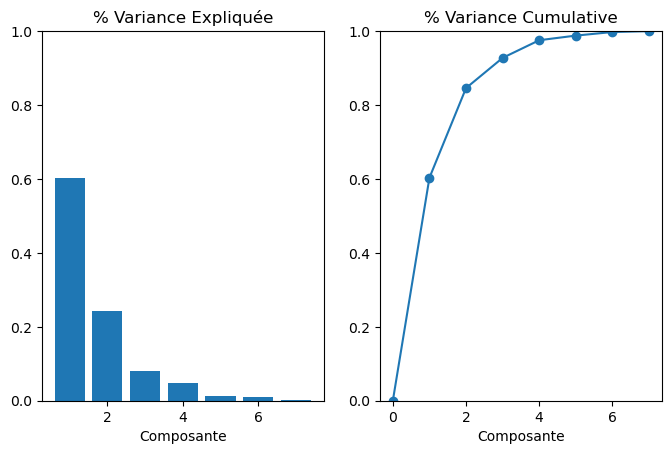

In [1222]:
# Call the plot_variance function
plot_variance(pca)

Notre colonne F1 explique à elle seul 77% de l'information contneu dans nos données d'origine.

Nos deux colonnes F1 et F2 explique 87% de l'information contenu dans nos données d'origine.

Nos trois colonnes F1, F2 et F3 explique 96% de l'information contenu dans nos données d'origine.

## ACP 3 component

In [1223]:
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(data_num)

PCA(n_components=3)

In [1224]:
# Obtenir les composantes principales
pcs = pca.components_

# Convertir les composantes principales en un DataFrame
pcs = pd.DataFrame(pcs)

# Définir les noms des colonnes du DataFrame comme les noms des variables originales
features = data_num.columns
pcs.columns = features

# Définir les index du DataFrame comme les noms des composantes principales (F1, F2)
x_list = list(range(1, len(pcs) + 1))
pcs.index = [f"F{i}" for i in x_list]

# Arrondir les valeurs du DataFrame à deux décimales
pcs.round(2)

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,Population,PIB US $ par habitant
F1,-0.16,-0.25,-0.10,-0.04,-0.85,-0.00,-0.42
F2,0.12,0.81,0.04,0.26,-0.41,-0.15,0.27
F3,-0.04,-0.40,0.39,0.03,-0.30,0.12,0.76


In [1225]:
def plot_all_pca_correlation_circles(pca, features):
    n_components = pca.n_components_
    fig, axs = plt.subplots(n_components-1, n_components-1, figsize=(15, 15))

    for i in range(n_components):
        for j in range(i+1, n_components):
            ax = axs[i, j-1]  # j-1 car il n'y a pas de subplot pour i=j
            for k in range(0, pca.components_.shape[1]):
                ax.arrow(0, 0, pca.components_[i, k], pca.components_[j, k], head_width=0.07, head_length=0.07, width=0.02)
                ax.text(pca.components_[i, k] + 0.05, pca.components_[j, k] + 0.05, features[k])
            ax.plot([-1, 1], [0, 0], color='grey', ls='--')
            ax.plot([0, 0], [-1, 1], color='grey', ls='--')
            ax.set_xlabel('F{} ({}%)'.format(i+1, round(100*pca.explained_variance_ratio_[i],1)))
            ax.set_ylabel('F{} ({}%)'.format(j+1, round(100*pca.explained_variance_ratio_[j],1)))
            ax.set_title("Cercle des corrélations (F{} et F{})".format(i+1, j+1))
            an = np.linspace(0, 2 * np.pi, 100)
            ax.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
            ax.axis('equal')

    plt.tight_layout()
    plt.show(block=False)

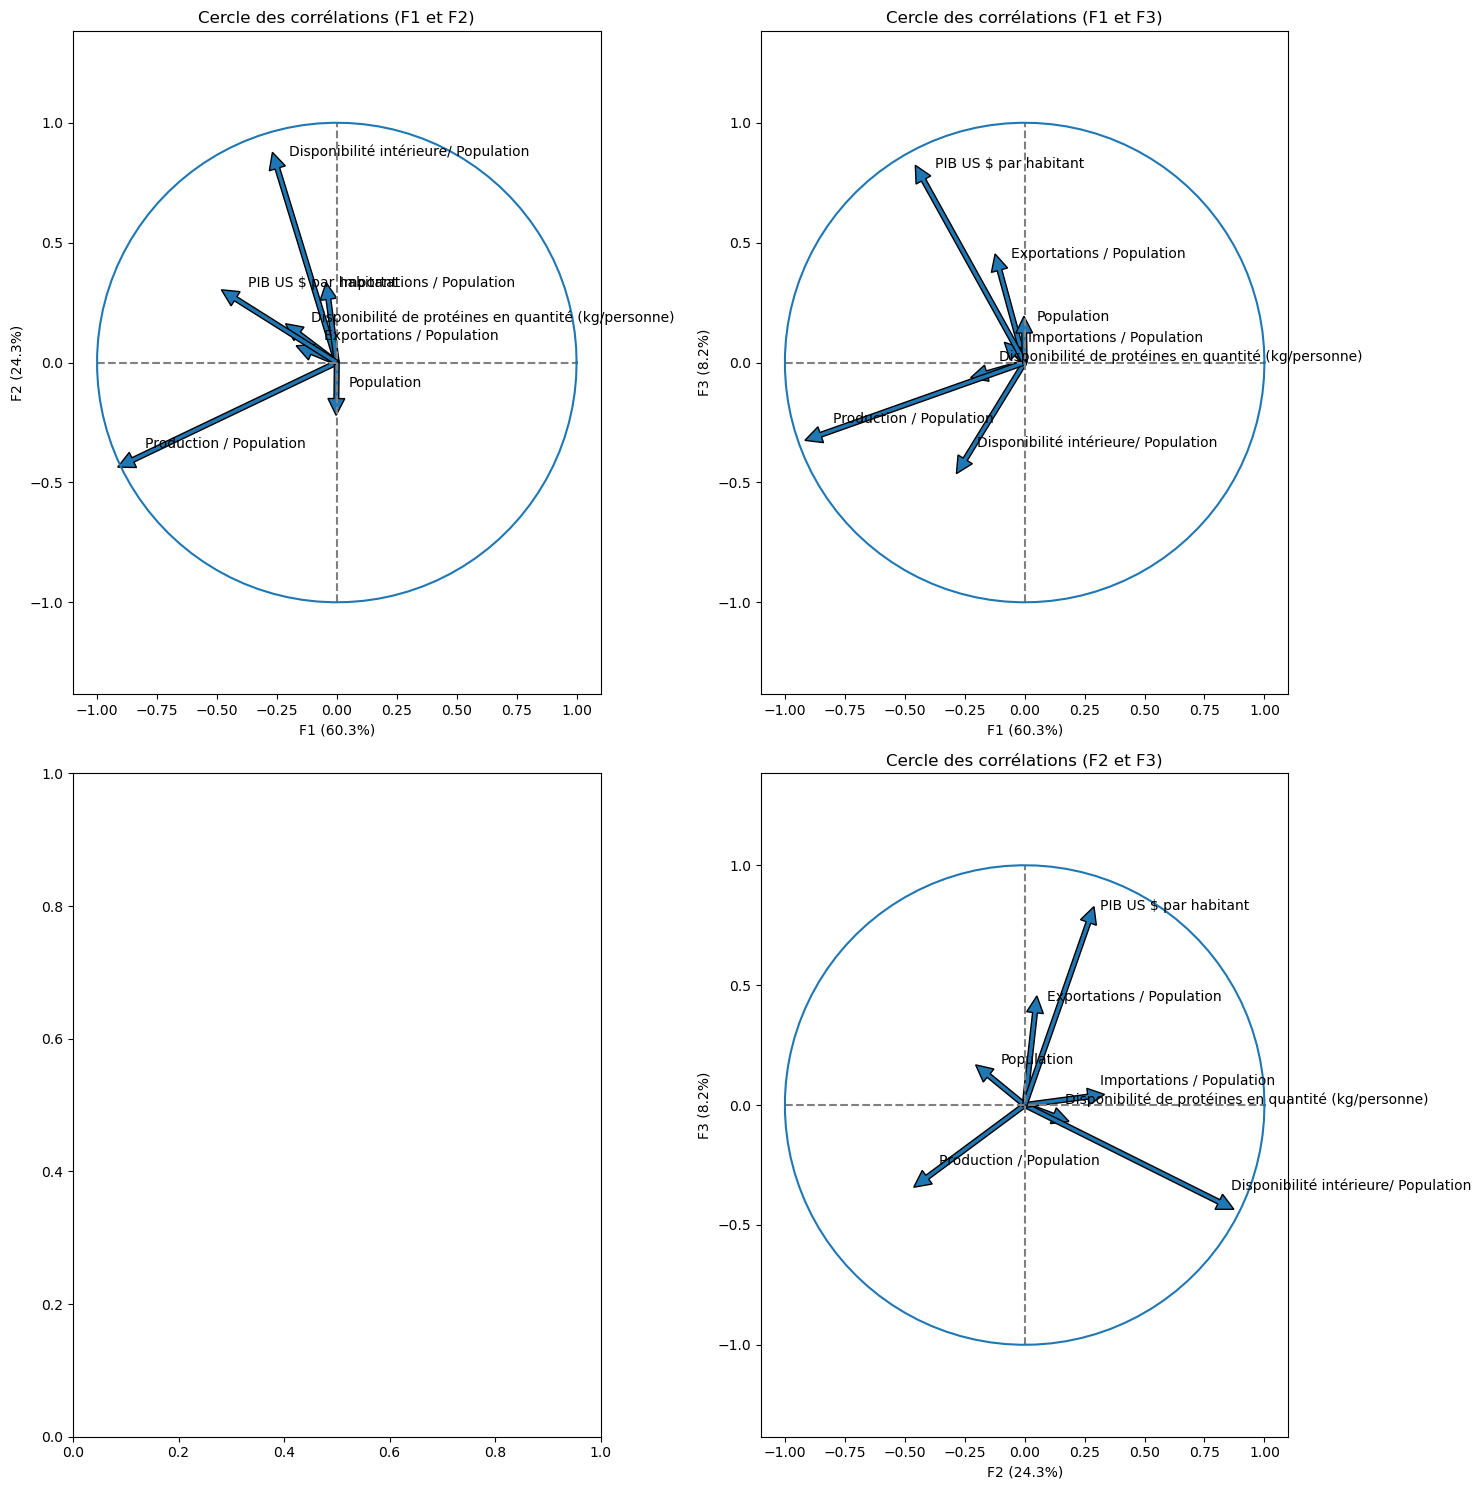

In [1226]:
# Utilisation de la fonction
plot_all_pca_correlation_circles(pca, features)

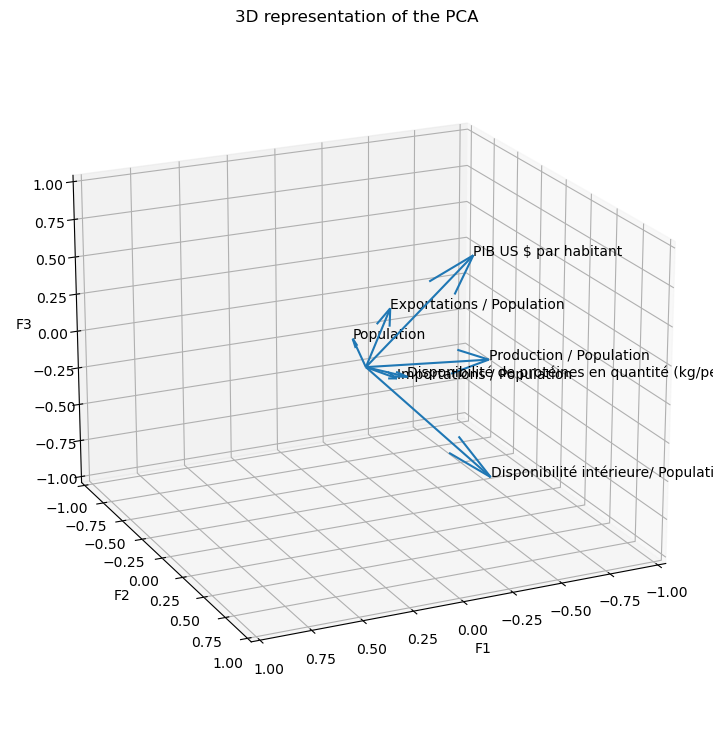

In [1227]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

for i in range(pca.components_.shape[1]):
    ax.quiver(0, 0, 0,
              pca.components_[0, i], pca.components_[1, i], pca.components_[2, i])

    ax.text(pca.components_[0, i], pca.components_[1, i], pca.components_[2, i], features[i])

ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')
ax.set_title("3D representation of the PCA")

# Définir les limites des axes
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

ax.view_init(elev=20, azim=65)
plt.show()

In [1228]:
import plotly.graph_objects as go

scaling_factor = 1.5  # Adjust the scaling factor as desired

fig = go.Figure()

for i in range(pca.components_.shape[1]):
    # Add a line for the vector
    fig.add_trace(go.Scatter3d(
        x=[0, pca.components_[0, i] * scaling_factor],
        y=[0, pca.components_[1, i] * scaling_factor],
        z=[0, pca.components_[2, i] * scaling_factor],
        mode='lines',
        name=features[i]
    ))

    # Add a cone for the arrowhead
    fig.add_trace(go.Cone(
        x=[pca.components_[0, i] * scaling_factor],
        y=[pca.components_[1, i] * scaling_factor],
        z=[pca.components_[2, i] * scaling_factor],
        u=[pca.components_[0, i] * scaling_factor],
        v=[pca.components_[1, i] * scaling_factor],
        w=[pca.components_[2, i] * scaling_factor],
        sizemode="absolute",
        sizeref=0.2,
        anchor="cm"
    ))

fig.update_layout(
    title="3D representation of the PCA",
    scene=dict(
        xaxis_title='F1',
        yaxis_title='F2',
        zaxis_title='F3',
        aspectratio=dict(x=1, y=1, z=1),
        camera=dict(eye=dict(x=1.2, y=1.2, z=0.6))
    ),
    legend=dict(
        yanchor="top",
        y=0.1,
        xanchor="left",
        x=0.001
    )
)

fig.show()

In [1229]:
import plotly.graph_objects as go

principal_components_pivot = pca.fit_transform(data_num)

fig = go.Figure(data=[go.Scatter3d(
    x=principal_components_pivot[:, 0],
    y=principal_components_pivot[:, 1],
    z=principal_components_pivot[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.8
    )
)])

fig.update_layout(
    title='ACP - Vue en 3D',
    scene = dict(
        xaxis_title='Composante principale 1',
        yaxis_title='Composante principale 2',
        zaxis_title='Composante principale 3'
    )
)

fig.show()

In [1230]:
X_proj = pca.transform(data_num)
df = pd.DataFrame(X_proj, columns = ["F1", "F2","F3"])
df_test = df.copy()
df.head()

,F1,F2,F3
0,1.674692,-0.453087,0.035521
1,-0.680893,-0.428009,-0.129397
2,0.295187,0.419383,-0.090926
3,0.375498,-0.536980,0.156832
4,-0.667215,-0.279339,0.752458


# PIPE  

## Dendogramme

In [1231]:
# # Créer le pipeline pour le dendogramme
# pipe_dendogramme = Pipeline([
#     ('scaler', StandardScaler()),
#     ('agg', AgglomerativeClustering(n_clusters=nb_clusters, linkage='ward'))
# ])


# def create_dendrogram(df, pipe_dendogramme):
#     """Crée et affiche un dendrogramme pour un DataFrame donné, en utilisant un pipeline donné."""
#     Z = linkage(pipe_dendogramme['scaler'].transform(df), method='ward')
#     clusters = fcluster(Z, 3, criterion='maxclust')
#     plt.figure(figsize=(10, 7))
#     dendrogram(Z)
#     plt.show()

In [1232]:
# # Ajuster le pipeline
# pipe_dendogramme.fit(df)
# create_dendrogram(df, pipe_dendogramme)

## Kmeans

In [1233]:
# # créer le pipeline pour le kmeans
# pipe_kmeans = Pipeline([
#     ('scaler', StandardScaler()),
#     ('kmeans', KMeans(n_clusters=nb_clusters, random_state=0))
# ])

In [1234]:
# # ajuster le pipeline]
# pipe_kmeans.fit(df)

# IV. CAH -- Dendogramme

Nous allons effectuer une classification ascendante hiérarchique avec la méthode de ward. Cette méthode est utilisé pour calculer les distances entre cluster et minimiser la variance intra cluster.

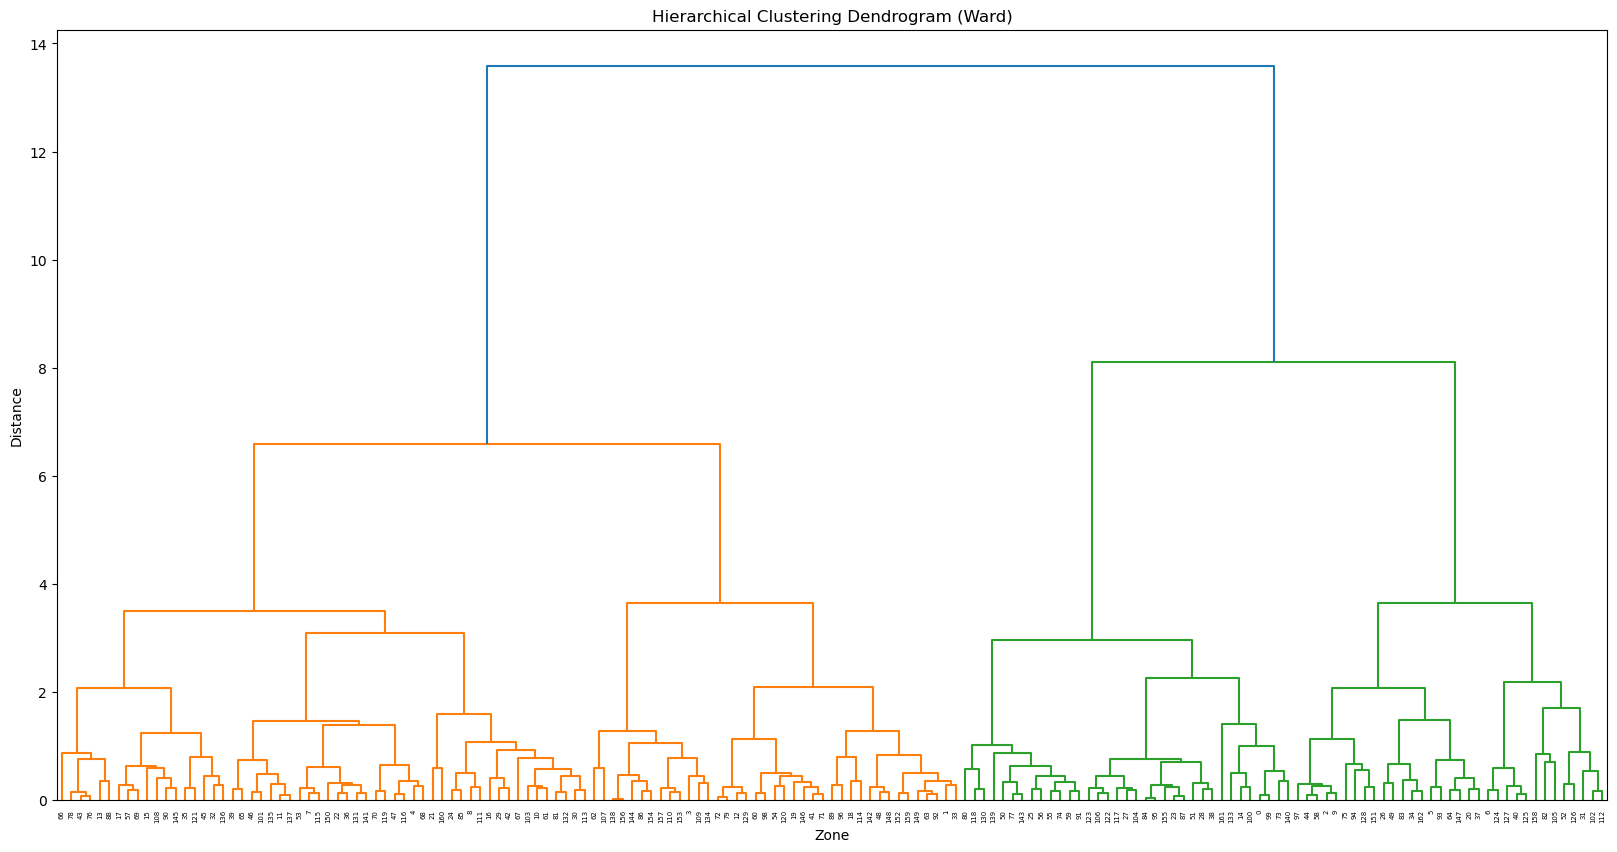

In [1235]:
# création du modèle
Z = linkage(df, 'ward')

# Afficher le dendrogramme
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Zone')
plt.ylabel('Distance')
dendrogram(Z,  leaf_rotation=90)
plt.show()

Nous allons selectionenr le nombre de clusters qui nous intéressent.


In [1236]:
# Coupage du dendrogramme en clusters
clusters = fcluster(Z, nb_clusters, criterion='maxclust')

# VI.Kmeans

Nous allons utiliser la méthode du coude et le score de silhouette afin de trouver le nombre de clusters que nous allons définir pour notre Kmeans.

In [1237]:
# Import the os module
import os
# Set the environment variable 'OMP_NUM_THREADS' to '1'
os.environ['OMP_NUM_THREADS'] = '1'

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

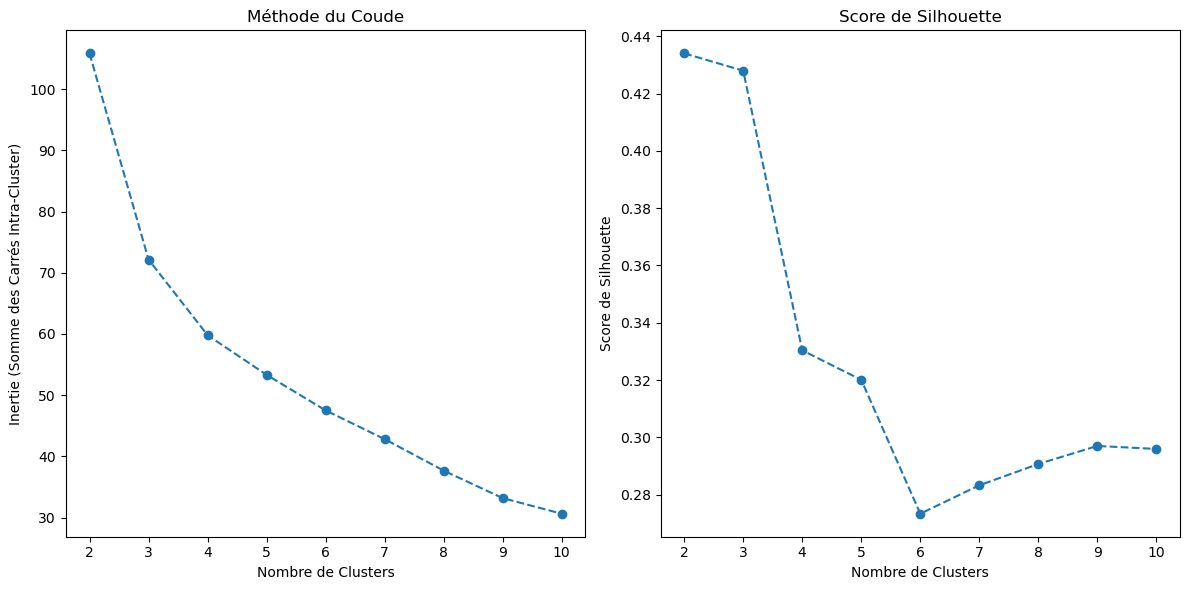

In [1238]:
# Définir une plage de nombres de clusters à tester
plage_de_clusters = range(2, 11) 

# Listes pour stocker l'inertie et les scores de silhouette
valeurs_inertie = []
scores_silhouette = []

# Itérer à travers différents nombres de clusters et ajuster K-Means
for n_clusters in plage_de_clusters:
    kmeans_pivot = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    clusters_pivot = kmeans_pivot.fit_predict(df_test)

    # Calculer l'inertie (somme des carrés intra-cluster)
    valeurs_inertie.append(kmeans_pivot.inertia_)

    # Calculer le score de silhouette
    scores_silhouette.append(silhouette_score(df_test, clusters_pivot))

# Tracer la méthode du coude pour déterminer le nombre optimal de clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(plage_de_clusters, valeurs_inertie, marker='o', linestyle='--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie (Somme des Carrés Intra-Cluster)')
plt.title('Méthode du Coude')

# Tracer le Score de Silhouette pour déterminer le nombre optimal de clusters
plt.subplot(1, 2, 2)
plt.plot(plage_de_clusters, scores_silhouette, marker='o', linestyle='--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score de Silhouette')
plt.title('Score de Silhouette')

plt.tight_layout()
plt.show()

Méthode du Coude (Elbow Method) :

La Méthode du Coude consiste à trouver le point dans un graphique de l'inertie où la diminution de l'inertie ralentit, formant un coude.
Ce point représente généralement le nombre optimal de clusters dans une analyse de clustering.

Score de Silhouette (Silhouette Score) :

Le Score de Silhouette mesure à quel point les points d'un cluster sont similaires entre eux et différents des autres clusters.
Il varie de -1 à 1, où un score élevé indique une meilleure séparation des clusters.
Le nombre optimal de clusters est généralement celui qui donne le score de silhouette le plus élevé.

Nous allons garder 9 clusters, le nombre optimal de clusters au vu des résultats serait 3. Cependant pour l'analyse métier avoir des cluster plsu petit et précis vont eprmettre d'affiner notre analyse. 

In [1239]:
# Importer la classe KMeans du module sklearn.cluster
from sklearn.cluster import KMeans

# Créer une instance de la classe KMeans avec 2 clusters
kmeans = KMeans(n_clusters=nb_clusters, n_init=10, random_state=42)

# Entraîner le modèle KMeans sur les données numériques
kmeans.fit(df_test)

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=9, n_init=10, random_state=42)

On va cherche les labels de nôre Kmeans afin d'attribuer plus tard un cluster à chaque pays

In [1240]:
# Obtenir les labels attribués par KMeans à chaque échantillon
labels = kmeans.labels_
labels[:10]

array([2, 0, 4, 5, 6, 1, 3, 8, 6, 4])

In [1241]:
# Ajouter la colonne 'cluster_kmeans' au dataframe 'data' avec les labels attribués par KMeans
df['cluster_kmeans'] = kmeans.labels_

In [1242]:
import plotly.express as px

fig = px.scatter_3d(df, x='F1', y='F2', z='F3', color='cluster_kmeans', color_continuous_scale='Viridis')

fig.update_layout(title='Graphique des clusters en 3D')
fig.show()

Ajoutons les centroids de nos clusters

In [1243]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.41906397, -0.32489769, -0.2675423 ],
       [ 1.15364173,  0.18420392, -0.07537642],
       [ 1.37275437, -0.54918164,  0.12896348],
       [ 0.1765285 ,  1.41005158,  0.06758536],
       [ 0.39837795,  0.53711692, -0.0450897 ],
       [ 0.49859528, -0.5177908 , -0.16147223],
       [-0.96367362, -0.47361186,  0.36038108],
       [-1.2060097 ,  0.04691763, -0.23545372],
       [-0.64842805,  0.29090631,  0.26462683]])

In [1244]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x='F1', y='F2', z='F3', color='cluster_kmeans', color_continuous_scale='Viridis')

# Ajouter les centroïdes au graphique
fig.add_trace(go.Scatter3d(x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2], 
                           mode='markers',
                           marker=dict(size=10, color='red'), 
                           name='centroids'))

fig.update_layout(title='Graphique des clusters en 3D')
fig.show()

# Reconstruction de notre df apres le clustering

Nous allons reconstruire notre dataframe initial en répétant les mêmes étapes dans l'autre sens. Le but est de pouvori avoir une image plus facile pour nos futurs comparaisons. Nosu allons aussi comparer nos deuc clusterings.

In [1245]:
# ajout de la colonne 'cluster_dd' au dataframe 'data' avec les labels attribués par le dendogramme
df['cluster_dd'] = clusters
# Ajouter la colonne 'cluster_kmeans' au dataframe 'data' avec les labels attribués par KMeans
df['cluster_kmeans'] = kmeans.labels_

In [1246]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Créer une figure avec 2 subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('K-Means Clustering', 'Clustering CAH'), specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

# Ajouter le scatter plot pour le clustering K-Means au premier subplot
fig.add_trace(
    go.Scatter3d(x=df['F1'], y=df['F2'], z=df['F3'], mode='markers', marker=dict(color=df['cluster_kmeans'], size=5, colorscale='Viridis', opacity=0.8)),
    row=1, col=1
)

# Ajouter le scatter plot pour le clustering basé sur le dendrogramme au deuxième subplot
fig.add_trace(
    go.Scatter3d(x=df['F1'], y=df['F2'], z=df['F3'], mode='markers', marker=dict(color=df['cluster_dd'], size=5, colorscale='Viridis', opacity=0.8)),
    row=1, col=2
)

# Mettre à jour les layouts pour ajouter les labels d'axes
fig.update_layout(height=600, width=800)
fig.update_xaxes(title_text="Feature1", row=1, col=1)
fig.update_yaxes(title_text="Feature2", row=1, col=1)
fig.update_xaxes(title_text="Feature1", row=1, col=2)
fig.update_yaxes(title_text="Feature2", row=1, col=2)

fig.show()

Reconstruction de nos données d'origine en y ajoutant nos clusters

In [1247]:
# Reconstruire les données d'origine
data_reconstructed = pca.inverse_transform(df_test)

# Conversion de l'array en DataFrame
data_reconstructed = pd.DataFrame(data_reconstructed)
column_names = data_num.columns
data_reconstructed.columns = column_names

data_reconstructed.head()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,Population,PIB US $ par habitant
0,0.402736,0.803935,1.568510,0.483765,2.627585,0.154413,0.146606
1,0.784924,1.474886,1.753097,0.567141,4.670296,0.134845,1.021983
2,0.730490,1.903602,1.702137,0.757894,3.484416,0.010409,0.864685
3,0.592396,1.009162,1.747858,0.511392,3.729988,0.184423,0.765028
4,0.761321,1.235927,2.097744,0.636756,4.332701,0.220998,1.727164


In [1248]:
#On refait les étapes dans l'autre sens pour obtenir les données d'origine
data['Production / Population'] = np.log(data['Production / Population']) / poids_prod
data['Exportations / Population'] = np.log(data['Exportations / Population'])/ poids_exp
data['Importations / Population'] = data['Importations / Population']/poids_imp
data['Disponibilité de protéines en quantité (kg/personne)'] = data['Disponibilité de protéines en quantité (kg/personne)'] / poids_disp_prot
data['PIB US $ par habitant'] = data['PIB US $ par habitant'] / poids_pib
data['Disponibilité intérieure/ Population'] = data['Disponibilité intérieure/ Population'] / poids_dispo_int

In [1249]:
# Supprimer la colonne 'cluster_kmeans' du dataframe 'data_reconstructed' car après le feature enginering, elle n'a plus assez de sens
data_reconstructed.drop(['Production / Population'], axis=1, inplace=True)

In [1250]:
# on va rapprocher nos clusters avec le dataframe initial
data_reconstructed['cluster_kmeans'] = df['cluster_kmeans']  
data_reconstructed['cluster_dd'] = df['cluster_dd']
data_reconstructed['Pays'] = pays
# Déplace les colonnes en premier 
data_reconstructed = data_reconstructed.set_index(['Pays', 'cluster_kmeans', 'cluster_dd']).reset_index()
data_reconstructed.head()

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
0,Afghanistan,2,7,0.402736,0.803935,1.568510,0.483765,0.154413,0.146606
1,Afrique du Sud,0,5,0.784924,1.474886,1.753097,0.567141,0.134845,1.021983
2,Albanie,4,8,0.730490,1.903602,1.702137,0.757894,0.010409,0.864685
3,Algérie,5,4,0.592396,1.009162,1.747858,0.511392,0.184423,0.765028
4,Allemagne,6,2,0.761321,1.235927,2.097744,0.636756,0.220998,1.727164


In [1251]:
data_reconstructed.describe()

,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,3.920245,4.920245,0.722879,1.600451,1.750010,0.660754,0.085167,0.946952
std,2.786612,2.540977,0.161684,0.541713,0.163995,0.157601,0.096979,0.490785
min,0.000000,1.000000,0.185789,-0.091066,1.471070,0.331631,-0.182113,0.086174
25%,1.000000,3.000000,0.591430,1.263207,1.622131,0.536591,0.034883,0.532885
50%,4.000000,5.000000,0.754669,1.582576,1.735475,0.650464,0.098992,0.937164
75%,6.000000,7.000000,0.850139,1.871190,1.866522,0.751705,0.139514,1.338622
max,8.000000,9.000000,1.035642,2.956018,2.135509,1.137712,0.313285,1.958214


In [1252]:
# Calculer les différences absolues entre le dataframe original et le dataframe reconstruit
differences = abs(data_num - data_reconstructed.drop(['cluster_kmeans', 'cluster_dd', 'Pays'], axis=1))

# Afficher les différences
print(differences.mean().sort_values(ascending=False))

Exportations / Population                               0.174877
Importations / Population                               0.097813
PIB US $ par habitant                                   0.075679
Population                                              0.073318
Disponibilité de protéines en quantité (kg/personne)    0.059520
Disponibilité intérieure/ Population                    0.034103
Production / Population                                      NaN
dtype: float64


In [1253]:
# on va calculer le variance expliquée par les 3 composantes principales
explained_variance = pca.explained_variance_ratio_.sum()
explained_variance

0.9276001219765894

On avait que 92% de notre jeu de données expliqué par nos 3 composantes principal mais on retrouve quand même un jeu de données proche

In [1254]:
data_reconstructed_num = data_reconstructed.select_dtypes(include=[np.number])

In [1255]:
# Modification du type des colonnes 'cluster_kmeans' et 'cluster_dd' en 'str'
data_reconstructed['cluster_kmeans'] = data_reconstructed['cluster_kmeans'].astype(str)
data_reconstructed['cluster_dd'] = data_reconstructed['cluster_dd'].astype(str)
data_recontructed_num = data_reconstructed.select_dtypes(include=[np.number])

# Evaluation des clusters


On va évaluer la qualité de notre clustering, nous allons utiliser le score de silhouette moyen 

## Score de silhouette

### Kmeans

Score de silhouette moyen : 0.2970416986616299


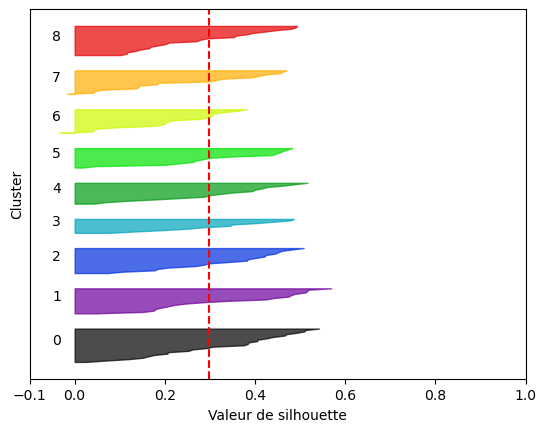

In [1256]:
# Calculer le score de silhouette moyen
silhouette_avg = silhouette_score(df_test, labels)
print(f"Score de silhouette moyen : {silhouette_avg}")

# Calculer les scores de silhouette individuels pour chaque échantillon
sample_silhouette_values = silhouette_samples(df_test, labels)

# Créer un silhouette plot
fig, ax = plt.subplots()
y_lower = 10

for i in range(len(np.unique(labels))):
    # Aggrège les scores de silhouette pour les échantillons appartenant à un cluster particulier
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / len(np.unique(labels)))
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiqueter chaque cluster avec son numéro au milieu
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calculer la nouvelle position y_lower pour le prochain plot
    y_lower = y_upper + 10

ax.set_xlabel("Valeur de silhouette")
ax.set_ylabel("Cluster")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


### Dendogramme

Score de silhouette moyen : 0.2778344285173204


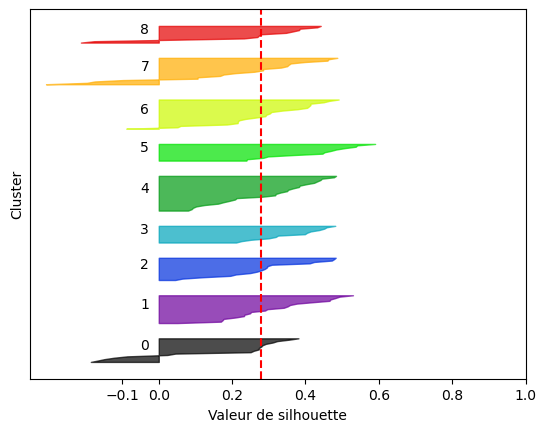

In [1257]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Réorganiser les numéros de cluster pour qu'ils soient continus de 0 à 1
clusters = clusters - 1

# Calculer le score de silhouette moyen
silhouette_avg = silhouette_score(df_test, clusters)
print(f"Score de silhouette moyen : {silhouette_avg}")

# Calculer les scores de silhouette individuels pour chaque échantillon
sample_silhouette_values = silhouette_samples(df_test, clusters)

# Créer un silhouette plot
fig, ax = plt.subplots()
y_lower = 10

for i in range(len(np.unique(clusters))):
    # Aggrège les scores de silhouette pour les échantillons appartenant à un cluster particulier
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / len(np.unique(clusters)))
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiqueter chaque cluster avec son numéro au milieu
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calculer la nouvelle position y_lower pour le prochain plot
    y_lower = y_upper + 10

ax.set_xlabel("Valeur de silhouette")
ax.set_ylabel("Cluster")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

Après le feature enginering nosu obtenons des scores de siloheutte plus faible. Après plusieurs itérations différentes j'ai réussi à monter jusqu'à 0.60 mais je n'avais pas assez de matière afin de fournir un analyse métier intéressante.

Nous allons garder notre clustering Kmeans car le score est légèrement plus élevé.

## ARI

In [1258]:
# Importer la fonction adjusted_rand_score du module sklearn.metrics
from sklearn.metrics import adjusted_rand_score

# Obtenir les labels attribués par KMeans et le dendrogramme
labels_kmeans = kmeans.labels_
labels_dendrogramme = clusters

# Calculer l'Indice de Rand Ajusté (ARI) en comparant les deux ensembles de labels
ari = adjusted_rand_score(labels_kmeans, labels_dendrogramme)

# Afficher le résultat
print("Indice de Rand :", ari)

Indice de Rand : 0.633108426320386


Nos deux clustering sont relativement proche au vu du résulat de notre ari plus proche de 1 que de 0.

# Etude des clusters

### Fonctions pour l'étude des clusters

In [1259]:
from math import pi

def get_cluster_data(data, cluster_column, cluster_value):
    """Renvoie un sous-ensemble de données pour le cluster spécifié."""
    return data[data[cluster_column] == cluster_value]

def radar_plot(*cluster_data_list):
    """Crée un radar plot pour les variables numériques de plusieurs clusters."""
    for i, cluster_data in enumerate(cluster_data_list):
        numeric_columns = cluster_data.select_dtypes(include='number').columns
        stats = cluster_data[numeric_columns].mean().tolist()
        stats += stats[:1]  # repeat the first value to close the circular graph
        angles = [n / float(len(numeric_columns)) * 2 * pi for n in range(len(numeric_columns))]
        angles += angles[:1]
        plt.polar(angles, stats, label=f'Cluster {i+1}')  # Ajoutez un label à chaque plot
        plt.fill(angles, stats, alpha=0.1)
    plt.xticks(angles[:-1], numeric_columns)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Ajoutez une légende à droite du graphique
    plt.show() 

def plot_boxplot(data):
    """Crée un boxplot pour toutes les colonnes numériques côte à côte."""
    numeric_columns = data.select_dtypes(include='number').columns
    sns.boxplot(data=data[numeric_columns])
    plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
    plt.show()
    
def radar_plot_subplot(cluster_data_list, ax):
    """Crée un radar plot pour les variables numériques de plusieurs clusters."""
    max_val = None
    for cluster_data in cluster_data_list:
        numeric_columns = cluster_data.select_dtypes(include='number').columns
        stats = cluster_data[numeric_columns].mean().tolist()
        if max_val is None or max(stats) > max_val:
            max_val = max(stats)  # Mettre à jour la valeur maximale
        stats += stats[:1]  # repeat the first value to close the circular graph
        angles = [n / float(len(numeric_columns)) * 2 * pi for n in range(len(numeric_columns))]
        angles += angles[:1]
        ax.plot(angles, stats)  # Utilisez plot au lieu de polar
        ax.fill(angles, stats, alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(numeric_columns)
    ax.set_ylim(0, max_val)  # Définir les limites de l'axe y

def plot_boxplot_subplot(data, ax):
    """Crée un boxplot pour toutes les colonnes numériques côte à côte."""
    numeric_columns = data.select_dtypes(include='number').columns
    sns.boxplot(data=data[numeric_columns], ax=ax)
    ax.set_xticklabels(numeric_columns, rotation=90)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité

def plot_subplots(cluster_data_list, data):
    """Crée un subplot avec un radar plot et un boxplot."""
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121, polar=True)
    ax2 = fig.add_subplot(122)
    radar_plot_subplot(cluster_data_list, ax1)
    plot_boxplot_subplot(data, ax2)
    plt.show()
    
def descriptive_statistics(cluster_data):
    """Affiche les statistiques descriptives pour les colonnes numériques du cluster."""
    numeric_columns = cluster_data.select_dtypes(include='number')
    print(numeric_columns.describe())
    
def analyze_cluster(data, cluster_column, cluster_value):
    """Analyse un cluster spécifié en appelant toutes les fonctions."""
    cluster_data = get_cluster_data(data, cluster_column, cluster_value)
    print('Boxplot et radarplot pour le cluster', cluster_value)
    plot_subplots([cluster_data], data)
    # print("Boxplot des colonnes numériques :")
    # plot_boxplot(cluster_data)
    # print("Radar plot des colonnes numériques :")
    # radar_plot(cluster_data)
    # print("Statistiques descriptives des colonnes numériques :")
    # descriptive_statistics(cluster_data)    

Création des datframes à partir des clusters

In [1260]:
from scipy import cluster
# Créez des DataFrames pour chaque cluster Kmeans
cluster_kmeans_dfs = []
for i in range(nb_clusters):
    cluster_kmeans_df = get_cluster_data(data_reconstructed, 'cluster_kmeans', str(i))
    cluster_kmeans_dfs.append(cluster_kmeans_df)

# Créez des DataFrames pour chaque cluster dendogramme
cluster_dd_dfs = []
for i in range(nb_clusters):
    cluster_dd_df = get_cluster_data(data_reconstructed, 'cluster_dd', str(i))
    cluster_dd_dfs.append(cluster_dd_df)

### Etude global des clusters

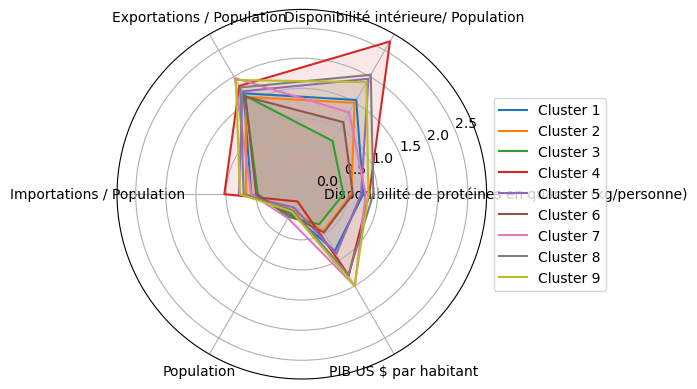

In [1261]:
radar_plot(cluster_kmeans_dfs[0], cluster_kmeans_dfs[1], cluster_kmeans_dfs[2], cluster_kmeans_dfs[3], cluster_kmeans_dfs[4], cluster_kmeans_dfs[5], cluster_kmeans_dfs[6], cluster_kmeans_dfs[7], cluster_kmeans_dfs[8])

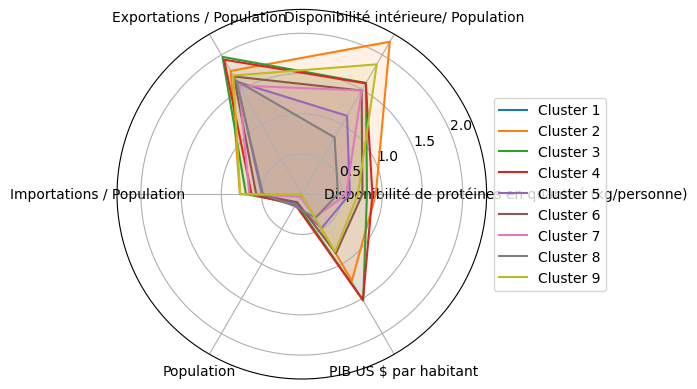

In [1262]:
radar_plot(cluster_dd_dfs[0], cluster_dd_dfs[1], cluster_dd_dfs[2], cluster_dd_dfs[3], cluster_dd_dfs[4], cluster_dd_dfs[5], cluster_dd_dfs[6], cluster_dd_dfs[7], cluster_dd_dfs[8])

### Création de la comparaison de le moyenne des valeurs par cluster par rapprot au global

In [1263]:
# Calculer la moyenne de chaque variable pour chaque cluster
data_reconstructed_mean = data_reconstructed_num.groupby('cluster_kmeans').mean()
data_reconstructed_mean.drop(['cluster_dd'], axis=1, inplace=True)
data_reconstructed_mean

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
cluster_kmeans,,,,,,
0,0.762071,1.549233,1.676882,0.580341,0.101856,0.833717
1,0.566151,1.494009,1.607949,0.666303,0.046017,0.451621
2,0.434749,0.763259,1.632016,0.472257,0.180924,0.319632
3,0.860669,2.671339,1.818400,1.029009,-0.118692,1.298969
4,0.726244,1.954861,1.714052,0.786949,-0.001835,0.887343
5,0.589418,1.122667,1.613176,0.501003,0.142137,0.475830
6,0.802323,1.310366,1.969430,0.582157,0.202505,1.502109
7,0.929345,2.032522,1.787818,0.707148,0.051446,1.289212
8,0.848265,1.890003,1.932493,0.769497,0.075263,1.499504


In [1264]:
# Calculer la moyenne de chaque variable pour l'ensemble du jeu de données
data_reconstructed_num.drop(['cluster_dd', 'cluster_kmeans'], axis=1, inplace=True)
overall_means = data_reconstructed_num.mean()
overall_means

Disponibilité de protéines en quantité (kg/personne)    0.722879
Disponibilité intérieure/ Population                    1.600451
Exportations / Population                               1.750010
Importations / Population                               0.660754
Population                                              0.085167
PIB US $ par habitant                                   0.946952
dtype: float64

In [1265]:
# Comparer les moyennes de chaque cluster à la moyenne générale
dif = data_reconstructed_mean - overall_means
dif

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
cluster_kmeans,,,,,,
0,0.039192,-0.051217,-0.073128,-0.080413,0.016689,-0.113235
1,-0.156728,-0.106442,-0.142061,0.005549,-0.039150,-0.495331
2,-0.288130,-0.837192,-0.117993,-0.188497,0.095757,-0.627320
3,0.137790,1.070888,0.068390,0.368255,-0.203860,0.352017
4,0.003365,0.354410,-0.035957,0.126195,-0.087002,-0.059609
5,-0.133461,-0.477784,-0.136833,-0.159751,0.056970,-0.471122
6,0.079444,-0.290085,0.219421,-0.078597,0.117337,0.555157
7,0.206467,0.432071,0.037808,0.046394,-0.033721,0.342260
8,0.125386,0.289552,0.182484,0.108743,-0.009904,0.552552


In [1266]:
dif['cluster_kmeans'] = dif.index
dif.reset_index(drop=True, inplace=True)
dif.head(10)

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,cluster_kmeans
0,0.039192,-0.051217,-0.073128,-0.080413,0.016689,-0.113235,0
1,-0.156728,-0.106442,-0.142061,0.005549,-0.039150,-0.495331,1
2,-0.288130,-0.837192,-0.117993,-0.188497,0.095757,-0.627320,2
3,0.137790,1.070888,0.068390,0.368255,-0.203860,0.352017,3
4,0.003365,0.354410,-0.035957,0.126195,-0.087002,-0.059609,4
5,-0.133461,-0.477784,-0.136833,-0.159751,0.056970,-0.471122,5
6,0.079444,-0.290085,0.219421,-0.078597,0.117337,0.555157,6
7,0.206467,0.432071,0.037808,0.046394,-0.033721,0.342260,7
8,0.125386,0.289552,0.182484,0.108743,-0.009904,0.552552,8


Une valeur négative indique que la moyenne générale est plus importante et inversement.

## Kmeans

### CLuster Kmeans 1

Boxplot et radarplot pour le cluster 0


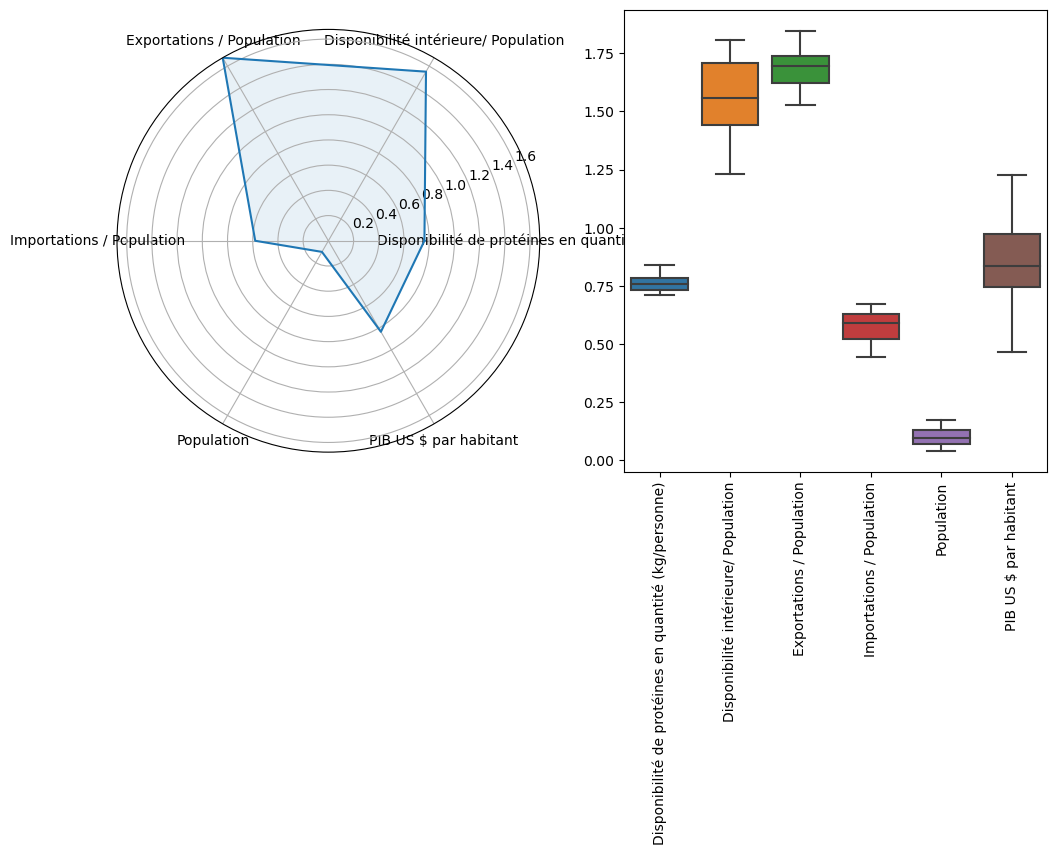

In [1267]:
analyze_cluster(cluster_kmeans_dfs[0], 'cluster_kmeans', '0')

In [1268]:
cluster_kmeans_dfs[0].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.762071,1.549233,1.676882,0.580341,0.101856,0.833717
std,0.036881,0.170731,0.085953,0.063180,0.037762,0.182869
min,0.711203,1.229839,1.528519,0.446044,0.041306,0.467984
25%,0.732384,1.440796,1.624535,0.519766,0.071446,0.745097
50%,0.760153,1.558869,1.694883,0.588522,0.098298,0.837753
75%,0.784924,1.708751,1.737762,0.631465,0.130574,0.972705
max,0.840772,1.808777,1.847005,0.671278,0.174735,1.226413


In [1269]:
cluster_kmeans_dfs[0].head()

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
1,Afrique du Sud,0,5,0.784924,1.474886,1.753097,0.567141,0.134845,1.021983
12,Azerbaïdjan,0,5,0.716707,1.560311,1.694883,0.624757,0.086881,0.819339
18,Bolivie (État plurinational de),0,5,0.836282,1.708751,1.528519,0.528159,0.071446,0.608034
19,Bosnie-Herzégovine,0,5,0.805164,1.808777,1.713054,0.671278,0.057589,0.972705
33,Colombie,0,5,0.772156,1.440796,1.655509,0.519766,0.128515,0.795345


In [1270]:
cluster_1 = dif[dif['cluster_kmeans'] == 0]
cluster_1

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,cluster_kmeans
0,0.039192,-0.051217,-0.073128,-0.080413,0.016689,-0.113235,0


- Caractéristiques distinctives : Faible disponibilité de protéines, importations et exportations par rapport à la population. PIB par habitant en dessous de la moyenne globale.

- Interprétation potentielle : Ce cluster pourrait représenter des régions avec une faible activité économique et des échanges internationaux limités.

### Cluster Kmeans 2

Boxplot et radarplot pour le cluster 1


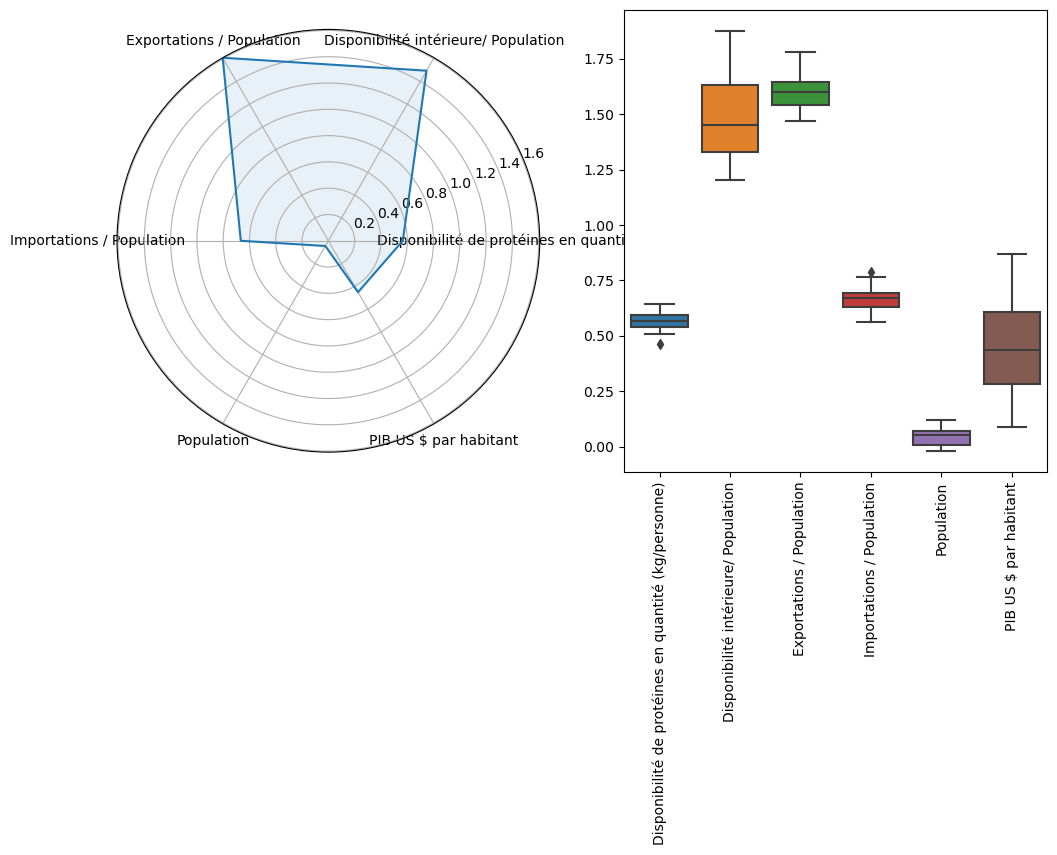

In [1271]:
analyze_cluster(cluster_kmeans_dfs[1], 'cluster_kmeans', '1')

In [1272]:
cluster_kmeans_dfs[1].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.566151,1.494009,1.607949,0.666303,0.046017,0.451621
std,0.045917,0.204372,0.093935,0.063026,0.042549,0.219792
min,0.461785,1.203863,1.471070,0.560284,-0.019125,0.086174
25%,0.541293,1.327064,1.542540,0.631497,0.007891,0.283385
50%,0.566873,1.450957,1.600073,0.671835,0.050055,0.433370
75%,0.594151,1.632818,1.643487,0.693737,0.072330,0.608248
max,0.642834,1.875916,1.780842,0.789342,0.117800,0.867517


In [1273]:
cluster_kmeans_dfs[1].head()

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
5,Angola,1,8,0.566873,1.313727,1.775350,0.665367,0.106955,0.806022
25,Bénin,1,6,0.590464,1.578847,1.580843,0.671835,0.030608,0.425274
34,Congo,1,8,0.642834,1.833786,1.641756,0.765122,-0.007007,0.628335
50,Gambie,1,6,0.550312,1.582576,1.515502,0.673259,0.010122,0.237233
51,Ghana,1,7,0.548544,1.203863,1.686352,0.594827,0.117800,0.588355


In [1274]:
cluster_2 = dif[dif['cluster_kmeans'] == 1]
cluster_2

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,cluster_kmeans
1,-0.156728,-0.106442,-0.142061,0.005549,-0.03915,-0.495331,1


- Caractéristiques distinctives : Toutes les variables sont en dessous de la moyenne globale, avec un PIB par habitant particulièrement bas.

- Interprétation potentielle : Ce cluster suggère des régions avec une faible disponibilité de protéines, une activité économique limitée et des échanges internationaux peu significatifs.

### Cluster Kmeans 3

Boxplot et radarplot pour le cluster 2


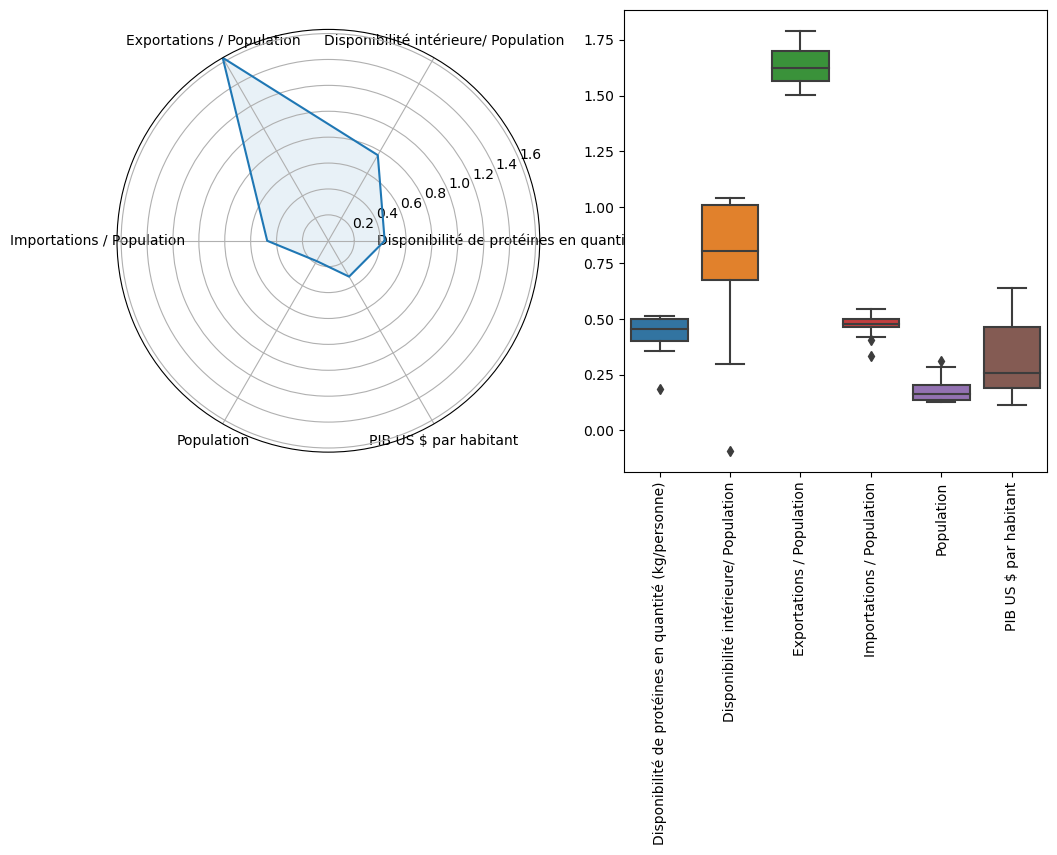

In [1275]:
analyze_cluster(cluster_kmeans_dfs[2], 'cluster_kmeans', '2')

In [1276]:
cluster_kmeans_dfs[2].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.434749,0.763259,1.632016,0.472257,0.180924,0.319632
std,0.079769,0.297400,0.087486,0.048316,0.055089,0.165560
min,0.185789,-0.091066,1.500527,0.331631,0.126405,0.111844
25%,0.398618,0.674001,1.564626,0.464066,0.136731,0.191605
50%,0.452467,0.803935,1.623027,0.477241,0.161685,0.259528
75%,0.499817,1.011445,1.699102,0.497582,0.205029,0.461766
max,0.513822,1.039562,1.790279,0.544220,0.313285,0.637807


In [1277]:
cluster_kmeans_dfs[2].head(19)

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
0,Afghanistan,2,7,0.402736,0.803935,1.568510,0.483765,0.154413,0.146606
14,Bangladesh,2,7,0.398324,0.436961,1.756117,0.419280,0.260259,0.531160
23,Burkina Faso,2,7,0.497998,1.018897,1.560741,0.500535,0.132454,0.250820
27,Cambodge,2,7,0.501637,1.039562,1.647589,0.544220,0.137958,0.443011
38,Côte d'Ivoire,2,7,0.513822,0.972627,1.694790,0.528934,0.162734,0.556463
73,Kenya,2,7,0.380213,0.560811,1.740290,0.475590,0.223443,0.480521
84,Madagascar,2,7,0.503142,1.009175,1.513407,0.472316,0.131329,0.154551
87,Mali,2,7,0.504191,1.013715,1.559539,0.493526,0.135504,0.255343
95,Mozambique,2,7,0.505698,1.027491,1.500527,0.472351,0.126405,0.130543
99,Niger,2,7,0.398911,0.762307,1.555227,0.463737,0.161685,0.111844


In [1278]:
cluster_3 = dif[dif['cluster_kmeans'] == 2]
cluster_3

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,cluster_kmeans
2,-0.28813,-0.837192,-0.117993,-0.188497,0.095757,-0.62732,2


- Caractéristiques distinctives : Faible disponibilité intérieure de protéines, fortes importations par rapport à la population, PIB par habitant en dessous de la moyenne globale.

- Interprétation potentielle : Ces régions pourraient dépendre fortement des importations pour leur disponibilité alimentaire, avec une activité économique modérée mais un PIB par habitant relativement bas.

### Cluster Kmeans 4

Boxplot et radarplot pour le cluster 3


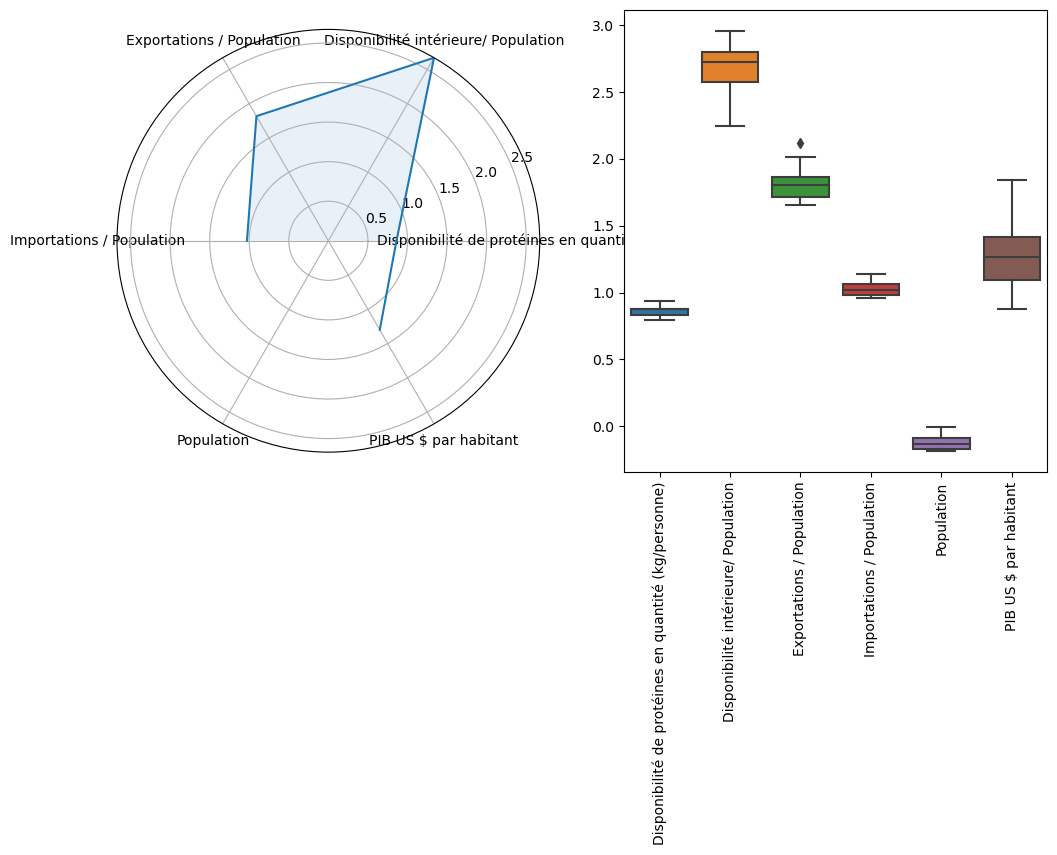

In [1279]:
analyze_cluster(cluster_kmeans_dfs[3], 'cluster_kmeans', '3')

In [1280]:
cluster_kmeans_dfs[3].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.860669,2.671339,1.818400,1.029009,-0.118692,1.298969
std,0.043910,0.213479,0.143485,0.056250,0.062002,0.296545
min,0.792072,2.247054,1.651689,0.956526,-0.182113,0.873986
25%,0.832656,2.574250,1.714147,0.985389,-0.167086,1.095616
50%,0.874505,2.725880,1.807270,1.019245,-0.129170,1.267286
75%,0.880531,2.798193,1.862246,1.064588,-0.086298,1.418399
max,0.938605,2.956018,2.116600,1.137712,-0.007604,1.843691


In [1281]:
cluster_kmeans_dfs[3].head(11)

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
6,Antigua-et-Barbuda,3,9,0.849169,2.821454,1.807270,1.093384,-0.159170,1.267286
31,Chine - RAS de Macao,3,9,0.881069,2.371010,2.016504,0.978686,-0.019762,1.738056
40,Dominique,3,9,0.822718,2.774931,1.711780,1.051533,-0.166624,1.028518
52,Grenade,3,9,0.938605,2.762411,1.693417,0.956526,-0.129170,1.125371
82,Luxembourg,3,9,0.792072,2.247054,2.116600,1.034759,-0.007604,1.843691
102,Nouvelle-Calédonie,3,9,0.878075,2.554389,1.891179,1.000824,-0.077659,1.471730
112,Polynésie française,3,9,0.874505,2.594110,1.828253,0.992092,-0.094937,1.333516
124,Saint-Kitts-et-Nevis,3,9,0.879994,2.956018,1.833313,1.137712,-0.178675,1.365068
125,Saint-Vincent-et-les Grenadines,3,9,0.842594,2.868536,1.716514,1.077644,-0.182113,1.065861
126,Sainte-Lucie,3,9,0.905446,2.708933,1.735879,0.976701,-0.122355,1.175577


In [1282]:
cluster_4 = dif[dif['cluster_kmeans'] == 3]
cluster_4

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,cluster_kmeans
3,0.13779,1.070888,0.06839,0.368255,-0.20386,0.352017,3


- Caractéristiques distinctives : Haute disponibilité intérieure de protéines, exportations importantes et PIB par habitant au-dessus de la moyenne globale.

- Interprétation potentielle : Des régions prospères économiquement avec une forte disponibilité intérieure de protéines et des exportations significatives mais une petite population.

### Cluster Kmeans 5

Boxplot et radarplot pour le cluster 4


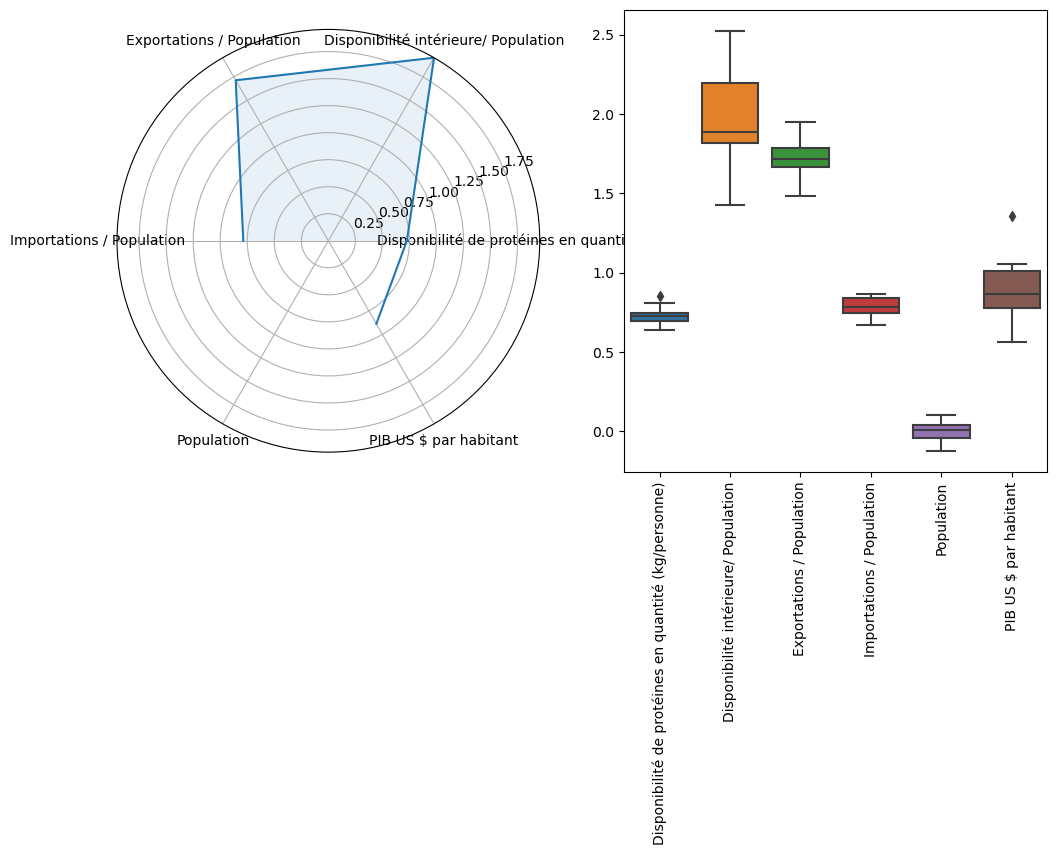

In [1283]:
analyze_cluster(cluster_kmeans_dfs[4], 'cluster_kmeans', '4')

In [1284]:
cluster_kmeans_dfs[4].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.726244,1.954861,1.714052,0.786949,-0.001835,0.887343
std,0.056835,0.290574,0.111142,0.062445,0.062688,0.192971
min,0.638958,1.424165,1.483208,0.667793,-0.121870,0.562473
25%,0.695358,1.814575,1.664681,0.745835,-0.039698,0.777072
50%,0.724728,1.885033,1.717548,0.782116,0.011440,0.864586
75%,0.744975,2.197625,1.785721,0.840417,0.039021,1.009316
max,0.853309,2.524411,1.949010,0.865187,0.105441,1.359710


In [1285]:
cluster_kmeans_dfs[4].head(16)

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
2,Albanie,4,8,0.730490,1.903602,1.702137,0.757894,0.010409,0.864685
9,Arménie,4,8,0.711221,1.866463,1.695530,0.753518,0.012471,0.826236
20,Botswana,4,8,0.639247,1.552044,1.788120,0.716771,0.074442,0.928357
26,Cabo Verde,4,8,0.737140,2.243004,1.642150,0.865187,-0.074558,0.756607
37,Cuba,4,8,0.677085,1.681944,1.823601,0.758358,0.059257,1.054571
44,Eswatini,4,8,0.719439,1.821100,1.672191,0.719077,0.023344,0.783894
49,Gabon,4,8,0.733429,2.102830,1.761055,0.862575,-0.029722,1.002875
58,Géorgie,4,8,0.721742,1.794999,1.708815,0.722786,0.034180,0.864486
75,Kiribati,4,8,0.853309,2.524411,1.483208,0.828347,-0.121870,0.562473
83,Macédoine du Nord,4,8,0.676134,2.009890,1.726280,0.850092,-0.029363,0.856644


In [1286]:
cluster_5 = dif[dif['cluster_kmeans'] == 4]
cluster_5

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,cluster_kmeans
4,0.003365,0.35441,-0.035957,0.126195,-0.087002,-0.059609,4


- Caractéristiques distinctives : Toutes les variables sont proches de la moyenne globale, avec des exportations, un PIB et une popualtion légèrement en dessous de la moyenne.

- Interprétation potentielle : Ce cluster représente des régions avec des caractéristiques relativement équilibrées en termes de disponibilité de protéines, d'activité économique et d'échanges internationaux.

### Cluster Kmeans 6

Boxplot et radarplot pour le cluster 5


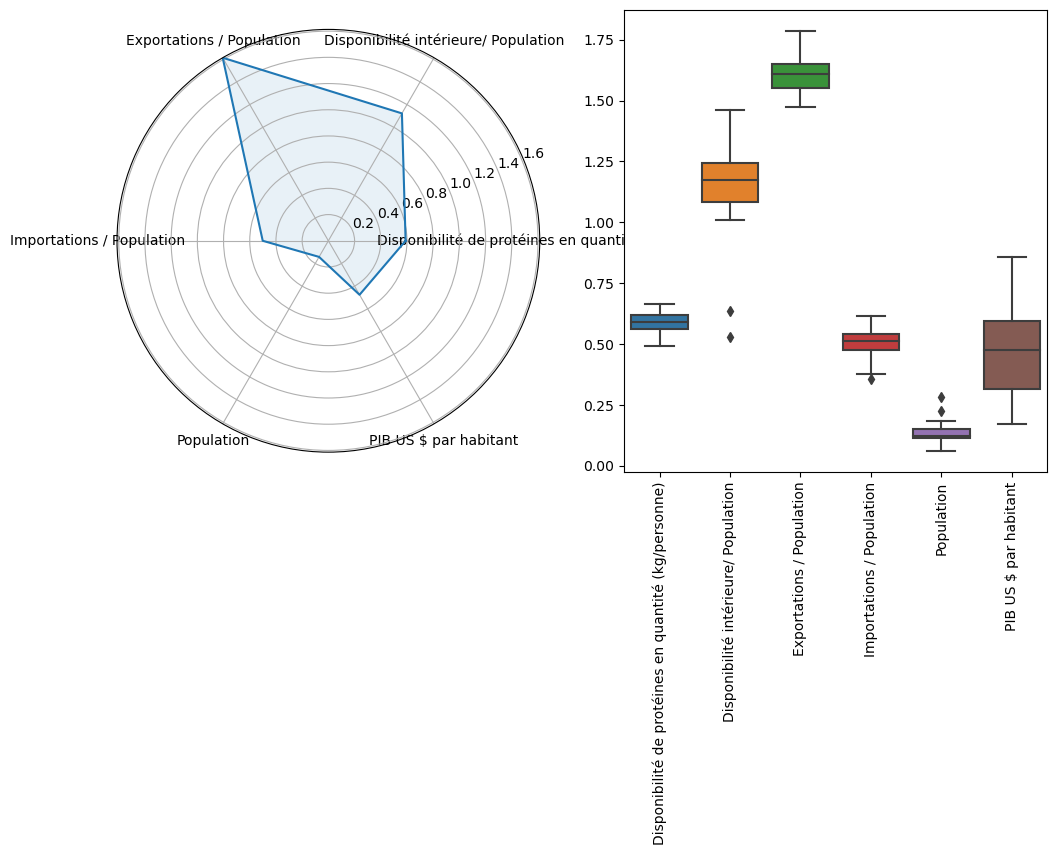

In [1287]:
analyze_cluster(cluster_kmeans_dfs[5], 'cluster_kmeans', '5')

In [1288]:
cluster_kmeans_dfs[5].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.589418,1.122667,1.613176,0.501003,0.142137,0.475830
std,0.048233,0.250867,0.092024,0.068669,0.054473,0.207059
min,0.491027,0.528294,1.471680,0.355635,0.061599,0.169756
25%,0.563667,1.082467,1.550928,0.475047,0.113233,0.315849
50%,0.588584,1.172773,1.607366,0.511392,0.122281,0.476229
75%,0.618699,1.243193,1.651354,0.541683,0.152185,0.593451
max,0.663160,1.460393,1.786545,0.613355,0.282478,0.856295


In [1289]:
cluster_kmeans_dfs[5].head(15)

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
3,Algérie,5,4,0.592396,1.009162,1.747858,0.511392,0.184423,0.765028
28,Cameroun,5,7,0.535464,1.043451,1.644389,0.520499,0.147328,0.476229
62,Indonésie,5,4,0.527685,0.528294,1.786545,0.378279,0.282478,0.753098
86,Malawi,5,4,0.585408,1.211217,1.471680,0.478216,0.104729,0.169756
107,Pakistan,5,4,0.491027,0.633685,1.576693,0.355635,0.223507,0.261869
109,Paraguay,5,4,0.663160,1.386104,1.744569,0.613355,0.116746,0.856295
110,Philippines,5,4,0.631073,1.121482,1.615010,0.471877,0.155712,0.528943
134,Sri Lanka,5,4,0.654959,1.313218,1.658319,0.551903,0.122281,0.657960
138,Sénégal,5,4,0.588584,1.225677,1.607366,0.540984,0.116775,0.466361
144,Togo,5,4,0.620564,1.460393,1.518803,0.575316,0.061599,0.322552


In [1290]:
cluster_6 = dif[dif['cluster_kmeans'] == 5]
cluster_6

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,cluster_kmeans
5,-0.133461,-0.477784,-0.136833,-0.159751,0.05697,-0.471122,5


- Caractéristiques distinctives : Faible disponibilité de protéines, exportations et importations par rapport à la population, PIB par habitant en dessous de la moyenne globale.

- Interprétation potentielle : Ce cluster pourrait indiquer des régions avec une activité économique modérée et une faible disponibilité de protéines.

### Cluster Kmeans 7

Boxplot et radarplot pour le cluster 6


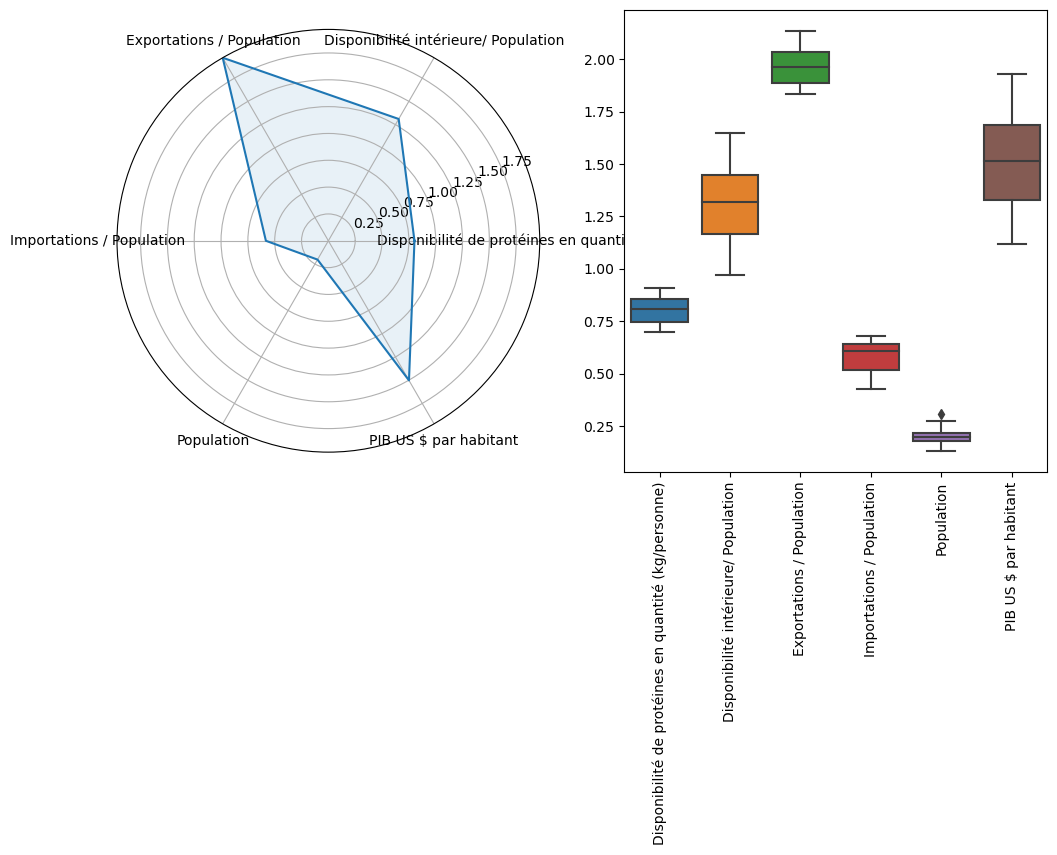

In [1291]:
analyze_cluster(cluster_kmeans_dfs[6], 'cluster_kmeans', '6')

In [1292]:
cluster_kmeans_dfs[6].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.802323,1.310366,1.969430,0.582157,0.202505,1.502109
std,0.060060,0.212967,0.095478,0.071870,0.040390,0.243376
min,0.698381,0.971035,1.832054,0.427874,0.131428,1.116229
25%,0.747526,1.164343,1.887921,0.518332,0.176587,1.330049
50%,0.807997,1.316651,1.963730,0.607017,0.198712,1.511888
75%,0.854779,1.447568,2.035768,0.638783,0.217645,1.685508
max,0.905863,1.646608,2.135509,0.678385,0.308871,1.930626


In [1293]:
cluster_kmeans_dfs[6].head(18)

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
4,Allemagne,6,2,0.761321,1.235927,2.097744,0.636756,0.220998,1.727164
8,Argentine,6,3,0.837940,1.416848,1.865972,0.555237,0.177356,1.325489
10,Australie,6,3,0.905863,1.636232,1.984197,0.648034,0.159199,1.668987
16,Belgique,6,3,0.873913,1.503939,2.125580,0.678385,0.195682,1.930626
21,Brésil,6,3,0.790512,0.976057,1.908459,0.427874,0.271728,1.343728
29,Canada,6,3,0.864295,1.534403,2.017457,0.650464,0.173877,1.687544
30,Chili,6,3,0.860392,1.646608,1.881075,0.639459,0.131428,1.393539
42,Espagne,6,3,0.827195,1.455130,1.973239,0.625155,0.176330,1.545362
47,France,6,2,0.799161,1.312182,2.062472,0.625676,0.211010,1.698869
48,Fédération de Russie,6,5,0.742927,1.156272,1.832054,0.501559,0.205783,1.129983


In [1294]:
cluster_7 = dif[dif['cluster_kmeans'] == 6]
cluster_7

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,cluster_kmeans
6,0.079444,-0.290085,0.219421,-0.078597,0.117337,0.555157,6


- Caractéristiques distinctives : Haute disponibilité intérieure de protéines, fortes exportations et PIB par habitant au-dessus de la moyenne globale.

- Interprétation potentielle : Des régions économiquement dynamiques avec une forte production intérieure de protéines et des exportations importantes.

### Cluster Kmeans 8

Boxplot et radarplot pour le cluster 7


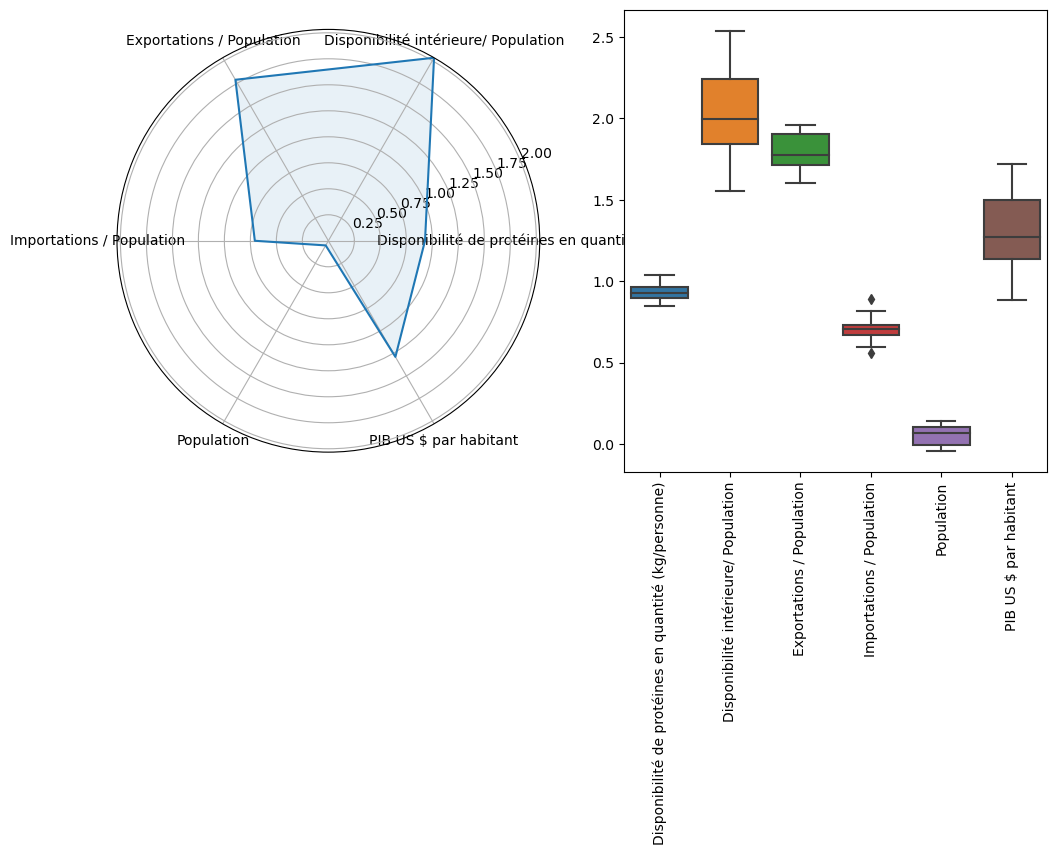

In [1295]:
analyze_cluster(cluster_kmeans_dfs[7], 'cluster_kmeans', '7')

In [1296]:
cluster_kmeans_dfs[7].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.929345,2.032522,1.787818,0.707148,0.051446,1.289212
std,0.051779,0.278178,0.118289,0.074682,0.060192,0.260402
min,0.851110,1.555443,1.604299,0.556617,-0.041161,0.882581
25%,0.895398,1.841438,1.715382,0.671656,-0.005945,1.135112
50%,0.925621,1.994136,1.773080,0.707460,0.070346,1.271788
75%,0.963991,2.240565,1.906983,0.734089,0.102659,1.496402
max,1.035642,2.538532,1.957112,0.888944,0.140216,1.717612


In [1297]:
cluster_kmeans_dfs[7].head(18)

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
15,Barbade,7,1,1.035642,2.538532,1.733642,0.814352,-0.041161,1.317889
17,Belize,7,1,0.971603,2.308564,1.611198,0.712662,-0.019718,0.969475
24,Bélarus,7,3,0.865335,1.669125,1.775610,0.599171,0.116374,1.173074
35,Costa Rica,7,1,0.851110,1.839578,1.762721,0.672982,0.070018,1.135176
45,Fidji,7,1,0.897983,2.197808,1.647825,0.735581,-0.012637,0.957071
57,Guyana,7,1,0.941152,2.254817,1.630712,0.720813,-0.014437,0.973434
61,Hongrie,7,3,0.894536,1.689346,1.909327,0.645031,0.135023,1.496405
66,Islande,7,1,1.010683,2.463672,1.934250,0.888944,-0.009806,1.717612
67,Israël,7,3,0.989629,2.002046,1.851490,0.679882,0.084440,1.496392
69,Jamaïque,7,1,0.916904,2.119117,1.604299,0.671214,0.007366,0.882581


In [1298]:
cluster_8 = dif[dif['cluster_kmeans'] == 7]
cluster_8

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,cluster_kmeans
7,0.206467,0.432071,0.037808,0.046394,-0.033721,0.34226,7


- Caractéristiques distinctives : Haute disponibilité intérieure de protéines, exportations et PIB par habitant au-dessus de la moyenne globale.

- Interprétation potentielle : Des régions prospères économiquement avec une forte production intérieure de protéines et des exportations significatives mais une petite population.

### Cluster Kmeans 9

Boxplot et radarplot pour le cluster 8


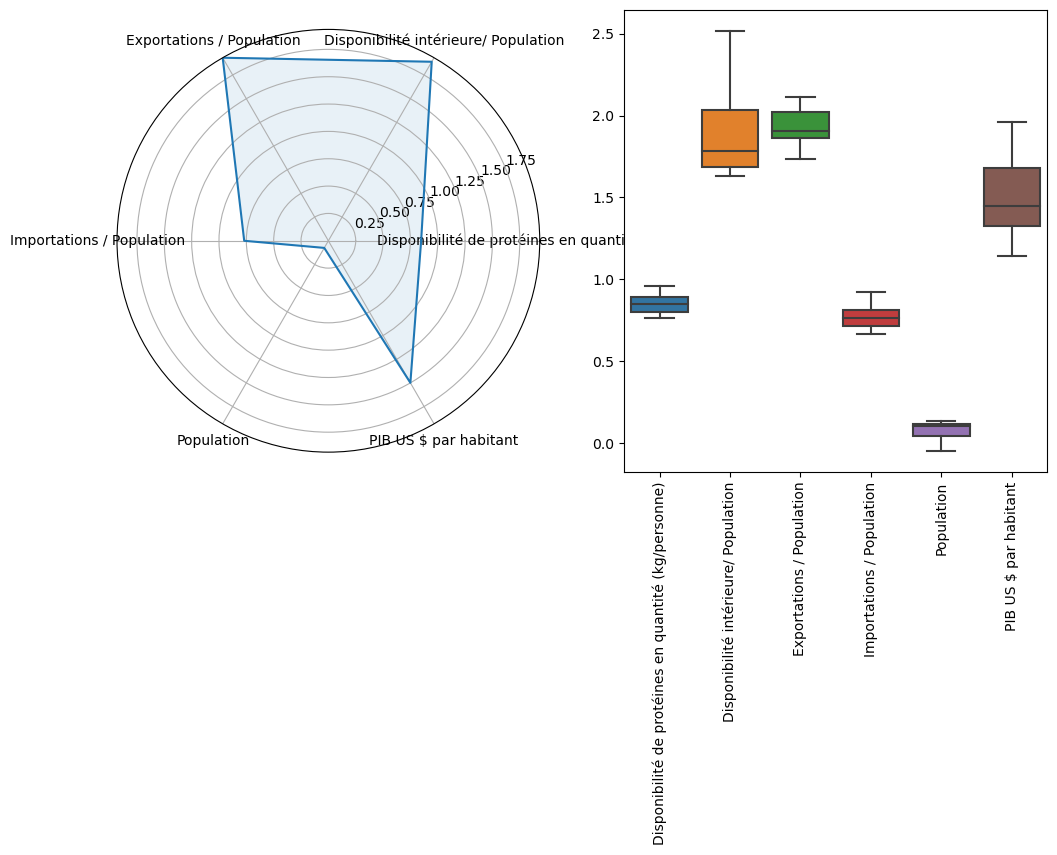

In [1299]:
analyze_cluster(cluster_kmeans_dfs[8], 'cluster_kmeans', '8')

In [1300]:
cluster_kmeans_dfs[8].describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.848265,1.890003,1.932493,0.769497,0.075263,1.499504
std,0.052181,0.261872,0.102545,0.068633,0.056153,0.226344
min,0.761726,1.631373,1.735475,0.667244,-0.048081,1.143888
25%,0.802661,1.688658,1.862241,0.713606,0.045231,1.323265
50%,0.847309,1.785490,1.905837,0.762682,0.101125,1.447912
75%,0.888537,2.035846,2.024734,0.809315,0.113589,1.678806
max,0.957188,2.518288,2.112649,0.919598,0.131998,1.958214


In [1301]:
cluster_kmeans_dfs[8].head(22)

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
7,Arabie saoudite,8,2,0.804393,1.657570,1.852123,0.670884,0.108124,1.265449
11,Autriche,8,2,0.835438,1.691271,2.059356,0.752964,0.131998,1.749851
13,Bahamas,8,1,0.957188,2.518288,1.854851,0.914383,-0.048081,1.485520
22,Bulgarie,8,2,0.801644,1.770499,1.823192,0.706182,0.077335,1.204301
32,Chypre,8,1,0.905278,2.177891,1.806439,0.791438,0.011321,1.306584
36,Croatie,8,2,0.794342,1.700557,1.869390,0.703008,0.096591,1.292453
39,Danemark,8,2,0.920982,1.882890,2.091314,0.784414,0.116771,1.927249
43,Estonie,8,1,0.872990,2.054835,1.915980,0.811911,0.042104,1.499593
46,Finlande,8,2,0.869005,1.795139,1.978305,0.736192,0.109218,1.618976
53,Grèce,8,2,0.820259,1.631373,1.893969,0.667244,0.123805,1.373308


In [1302]:
cluster_9 = dif[dif['cluster_kmeans'] == 8]
cluster_9

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant,cluster_kmeans
8,0.125386,0.289552,0.182484,0.108743,-0.009904,0.552552,8


- Caractéristiques distinctives : Toutes les variables sont au-dessus de la moyenne globale, avec un PIB par habitant élevé.

- Interprétation potentielle : Ce cluster représente des régions prospères économiquement, avec une disponibilité de protéines, une activité économique et des échanges internationaux bien au-dessus de la moyenne mais une population faible

# Sélection des pays

Pour sélectionner notre cluster le plus pertinent on va prendre en compte le PIB par habitant car on a besoin que nos poulets se vendent. On va aussi regadrer la disponibilité alimentaire (avec ou sans protéine) pour avoir une idée de l'état du marché.

Cluster 7

In [1303]:
cluster_kmeans_dfs[5].head(15)

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
3,Algérie,5,4,0.592396,1.009162,1.747858,0.511392,0.184423,0.765028
28,Cameroun,5,7,0.535464,1.043451,1.644389,0.520499,0.147328,0.476229
62,Indonésie,5,4,0.527685,0.528294,1.786545,0.378279,0.282478,0.753098
86,Malawi,5,4,0.585408,1.211217,1.471680,0.478216,0.104729,0.169756
107,Pakistan,5,4,0.491027,0.633685,1.576693,0.355635,0.223507,0.261869
109,Paraguay,5,4,0.663160,1.386104,1.744569,0.613355,0.116746,0.856295
110,Philippines,5,4,0.631073,1.121482,1.615010,0.471877,0.155712,0.528943
134,Sri Lanka,5,4,0.654959,1.313218,1.658319,0.551903,0.122281,0.657960
138,Sénégal,5,4,0.588584,1.225677,1.607366,0.540984,0.116775,0.466361
144,Togo,5,4,0.620564,1.460393,1.518803,0.575316,0.061599,0.322552


Cluster 8

In [1304]:
cluster_kmeans_dfs[7].head(18)

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Population,PIB US $ par habitant
15,Barbade,7,1,1.035642,2.538532,1.733642,0.814352,-0.041161,1.317889
17,Belize,7,1,0.971603,2.308564,1.611198,0.712662,-0.019718,0.969475
24,Bélarus,7,3,0.865335,1.669125,1.775610,0.599171,0.116374,1.173074
35,Costa Rica,7,1,0.851110,1.839578,1.762721,0.672982,0.070018,1.135176
45,Fidji,7,1,0.897983,2.197808,1.647825,0.735581,-0.012637,0.957071
57,Guyana,7,1,0.941152,2.254817,1.630712,0.720813,-0.014437,0.973434
61,Hongrie,7,3,0.894536,1.689346,1.909327,0.645031,0.135023,1.496405
66,Islande,7,1,1.010683,2.463672,1.934250,0.888944,-0.009806,1.717612
67,Israël,7,3,0.989629,2.002046,1.851490,0.679882,0.084440,1.496392
69,Jamaïque,7,1,0.916904,2.119117,1.604299,0.671214,0.007366,0.882581
